In [70]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
#import altair as alt
import re
#from vega_datasets import data
import seaborn as sns
sns.set()


In [3]:
# Tamanho default das figuras
matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)

In [4]:
# Simple functions 
# Histogram
def basic_hist(col, title, x_name, y_name):
    """
    col: Dataframe column to be made into a histogram
    title: Histogram title
    x_name: X axis name label
    y_name: Y axis name label
    """
    color = tuple(np.random.choice(range(256), size=3))
    color = (color[0]/1000, color[1]/1000, color[2]/1000)
    plt.hist(col, color=color)
    plt.grid(linestyle='-')
    plt.xlabel(x_name, size='18')
    plt.ylabel(y_name, size='18')
    plt.title(title, size='20')
    plt.show()

def basic_bar(col, col_2, title, x_name, y_name):
    """
    col: Dataframe column to be made into a bar plot, names of each column
    col_2: Values of each column 
    title: Histogram title
    x_name: X axis name label
    y_name: Y axis name label
    """
    color = tuple(np.random.choice(range(256), size=3))
    color = (color[0]/1000, color[1]/1000, color[2]/1000)
    plt.bar(col, col_2, color=color)
    plt.grid(linestyle='-')
    plt.xlabel(x_name, size='18')
    plt.ylabel(y_name, size='18')
    plt.title(title, size='20')
    plt.show()    

## Número de Incidentes por Estado

In [5]:
df = pd.read_csv('../databases/gun_violence.zip', compression='zip')
num_incidentes = (df.groupby('state')
 .agg({'incident_id': 'count',
       'n_killed': 'sum',
       'n_injured': 'sum'})
 .rename(columns={'incident_id':'Number Of Incidents'})
 .sort_values(['Number Of Incidents', 'n_killed', 'n_injured'], ascending=False)
 .reset_index()
)
num_incidentes

,state,Number Of Incidents,n_killed,n_injured
0,Illinois,17556,3409,13514
1,California,16306,5562,7644
2,Florida,15029,3909,7072
3,Texas,13577,5046,6106
4,Ohio,10244,2508,5703
5,New York,9712,1705,5059
6,Pennsylvania,8929,2395,5056
7,Georgia,8925,2456,4056
8,North Carolina,8739,2225,4629
9,Louisiana,8103,2179,4398


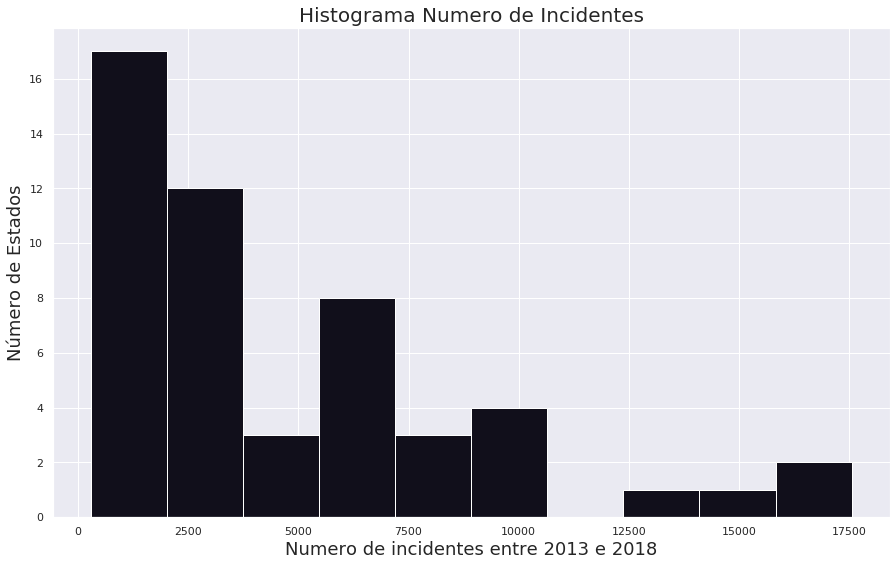

In [6]:
basic_hist(num_incidentes['Number Of Incidents'], 'Histograma Numero de Incidentes', 'Numero de incidentes entre 2013 e 2018', 'Número de Estados')

#### Por estado dos EUA

In [7]:
#alt.data_transformers.enable('default', max_rows=None)

In [8]:
gun_violence = pd.read_csv('../databases/gun_violence_clean.zip', compression='zip')

In [9]:
gun_violence

,Unnamed: 0,incident_id,state,latitude,longitude,n_killed,n_injured,gun_stolen,gun_type,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_type,year,month,day
0,2,478855,Ohio,41.4455,-82.1377,1,3,"['Unknown', 'Unknown']","['Unknown', 'Unknown']",2.0,"['25', '31', '33', '34', '33']","['Adult', 'Adult', 'Adult', 'Adult', 'Adult']","['Male', 'Male', 'Male', 'Male', 'Male']","['Subject', 'Suspect', 'Subject', 'Suspect', '...",2013,1,1
1,4,478959,North Carolina,36.1140,-79.9569,2,2,"['Unknown', 'Unknown']","['Handgun', 'Handgun']",2.0,"['18', '46', '14', '47']","['Adult', 'Adult', 'Teen', 'Adult']","['Female', 'Male', 'Male', 'Female']","['Victim', 'Victim', 'Victim', 'Subject', 'Sus...",2013,1,7
2,6,479363,New Mexico,34.9791,-106.7160,5,0,"['Unknown', 'Unknown']","['LR', 'Rem', 'AR']",2.0,"['51', '40', '9', '5', '2', '15']","['Adult', 'Adult', 'Child', 'Child', 'Child', ...","['Male', 'Female', 'Male', 'Female', 'Female',...","['Victim', 'Victim', 'Victim', 'Victim', 'Vict...",2013,1,19
3,10,491674,Tennessee,35.0221,-85.2697,1,3,['Unknown'],['Unknown'],1.0,['19'],['Adult'],"['Male', 'Male', 'Male', 'Male']","['Victim', 'Victim', 'Victim', 'Victim', 'Subj...",2013,1,23
4,11,479413,Missouri,38.7067,-90.2494,1,3,['Unknown'],['Unknown'],1.0,['28'],['Adult'],['Male'],"['Victim', 'Victim', 'Victim', 'Victim', 'Subj...",2013,1,25
5,12,479561,Louisiana,29.8816,-91.5251,2,3,['Unknown'],['Shotgun'],1.0,"['78', '48']","['Adult', 'Adult', 'Adult', 'Adult', 'Adult']","['Male', 'Male', 'Male', 'Male', 'Male']","['Victim', 'Victim', 'Victim', 'Victim', 'Subj...",2013,1,26
6,15,479573,Tennessee,35.0803,-89.8871,0,5,['Unknown'],['Handgun'],1.0,['24'],"['Adult', 'Adult', 'Adult', 'Adult', 'Adult']","['Female', 'Female', 'Female', 'Female', 'Fema...","['Victim', 'Victim', 'Victim', 'Victim', 'Vict...",2013,2,2
7,16,479580,California,39.1236,-121.5830,1,3,['Unknown'],['mm'],1.0,"['20', '25', '18', '19']","['Adult', 'Adult', 'Adult', 'Adult', 'Adult', ...","['Male', 'Male', 'Female', 'Male', 'Male', 'Ma...","['Victim', 'Victim', 'Victim', 'Victim', 'Subj...",2013,2,3
8,18,479603,Louisiana,29.9563,-90.0676,0,4,['Unknown'],['Handgun'],1.0,"['18', '22', '21', '29', '19', '22', '23']","['Adult', 'Adult', 'Adult', 'Adult', 'Adult', ...","['Male', 'Female', 'Female', 'Male', 'Male', '...","['Victim', 'Victim', 'Victim', 'Victim', 'Subj...",2013,2,9
9,20,480327,Delaware,39.7407,-75.5499,3,2,['Unknown'],['Auto'],1.0,"['39', '68']","['Adult', 'Adult', 'Adult', 'Adult', 'Adult']","['Female', 'Female', 'Male', 'Male', 'Male']","['Victim', 'Victim', 'Victim', 'Victim', 'Subj...",2013,2,11


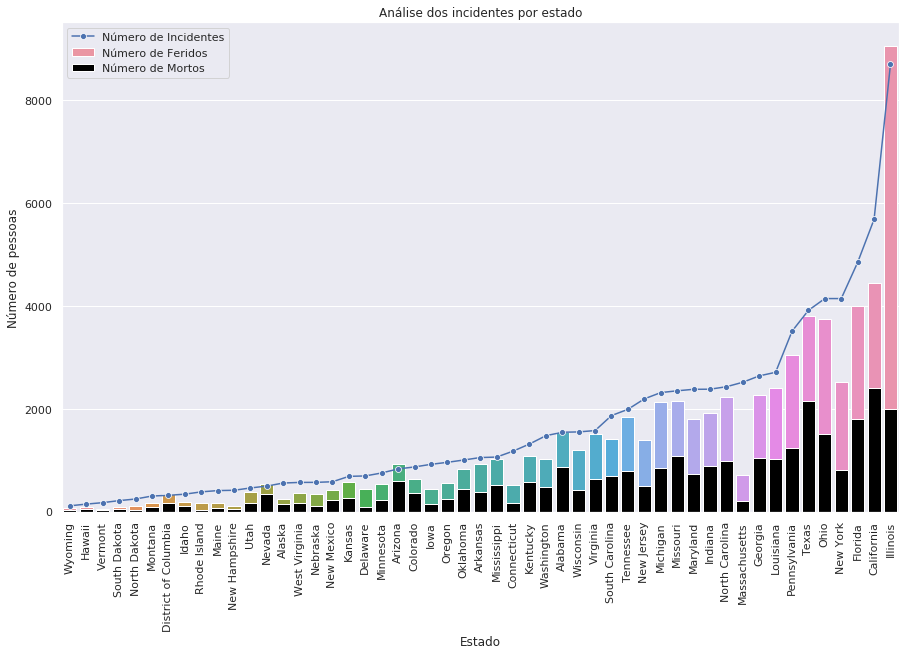

In [10]:
# TODO: Divide the number of incides by the population to get the number of incidents per capita.
#       Needs improvement - conferir se num de acidentes faz sentido com num de feridos


# Tirar o comentário abaixo para ajustar o tamanho da figura com essa linha caso desejado:
#matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)


# Ajusta um dataframe com os dados para plotar
incidents_state = gun_violence.groupby('state')\
                  .agg({'latitude':'mean', 'longitude':'mean', 'n_injured':'sum', 
                        'incident_id':'count', 'n_killed':'sum'})\
                  .rename(columns={'incident_id':'number_of_incidents'})\
                  .sort_values('number_of_incidents')\
                  .reset_index()

incidents_state['total_killed_injured'] = (incidents_state['n_injured'] + 
                                           incidents_state['n_killed'])

# Define o plot
sns.lineplot(x='state', y='number_of_incidents', marker='o',
                     data=incidents_state, label='Número de Incidentes', sort=False)
sns.barplot(x='state', y='total_killed_injured',
                     data=incidents_state, label='Número de Feridos')
sns.barplot(x='state', y='n_killed', color="black",
                     data=incidents_state,label='Número de Mortos')
# Título do plot
plt.title("Análise dos incidentes por estado")
# Nome do eixo x
plt.xlabel('Estado')
# Nome do eixo y
plt.ylabel('Número de pessoas')
# Rotaciona nomes no eixo x
plt.xticks(rotation=90)
plt.legend()
plt.show()

#### Ao longo dos anos

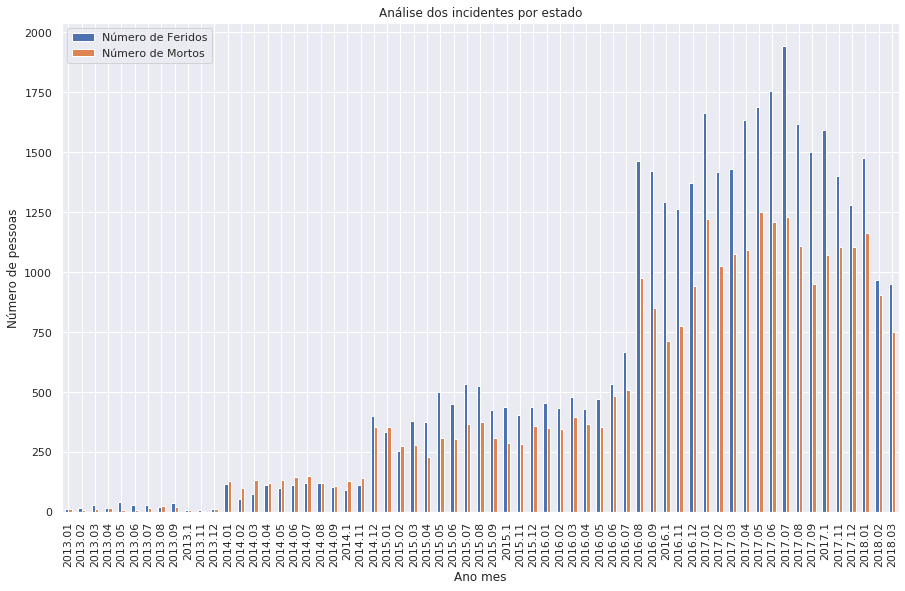

In [50]:
# Tirar o comentário abaixo para ajustar o tamanho da figura com essa linha caso desejado:
#matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)

incidents_year = gun_violence.groupby(['month', 'year'])\
                  .agg({'n_injured':'sum', 'incident_id':'count', 'n_killed':'sum'})\
                  .rename(columns={'incident_id':'number_of_incidents'})\
                  .sort_values('number_of_incidents')\
                  .reset_index()
incidents_year['date'] = incidents_year['month']/100 + incidents_year['year']

incidents_year['total'] = (incidents_year['n_injured'] + 
                                           incidents_year['n_killed'])

incidents_year = incidents_year.sort_values('date')

# Define o plot
incidents_year.plot.bar(x='date', y=['n_injured', 'n_killed'], label=['Número de Feridos', 'Número de Mortos'])

# Título do plot
plt.title("Análise dos incidentes por estado")
# Nome do eixo x
plt.xlabel('Ano mes')
# Nome do eixo y
plt.ylabel('Número de pessoas')
# Rotaciona nomes no eixo x
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Idade dos envolvidos

In [52]:
participants = pd.read_csv('../databases/participants_clean.zip', compression='zip')

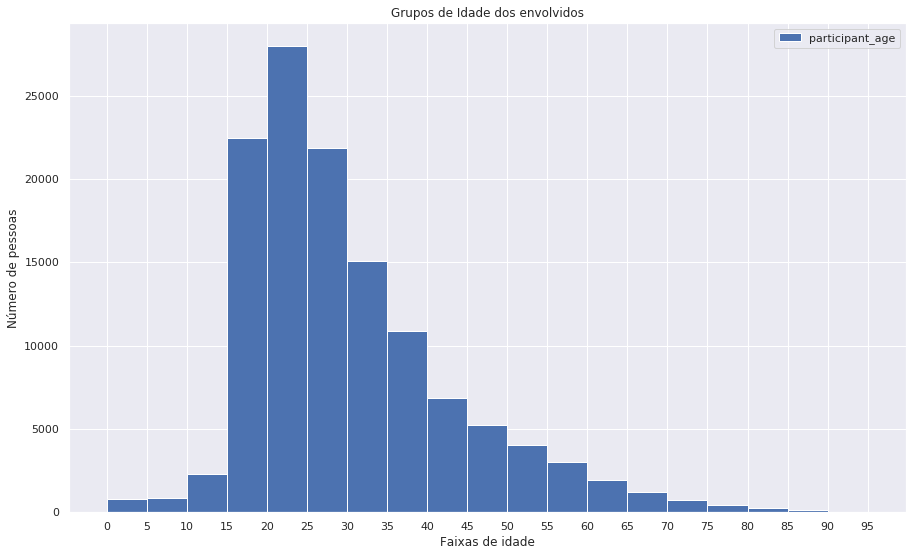

In [78]:


idade_participant = participants[['participant_age']]
ax = idade_participant.plot.hist(bins =  [i for i in range(0,100, 5)], label='Idade dos Participantes')

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

# Título do plot
plt.title("Grupos de Idade dos envolvidos")
# Nome do eixo x
plt.xlabel('Faixas de idade')
# Nome do eixo y
plt.ylabel('Número de pessoas')
# Rotaciona nomes no eixo x
plt.legend()
plt.show()


## Trends

In [13]:
df = pd.read_csv('../databases/gun_violence.zip', compression='zip')

### Incidents per year

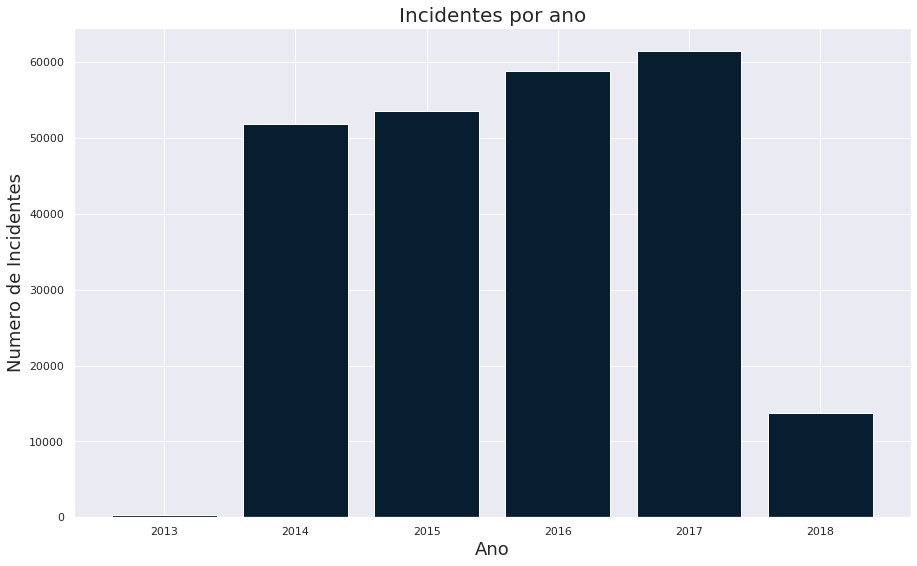

In [14]:
df['year'] = df['date'].map(lambda x: x[0:4])
a_per_year = (df.groupby('year')
              .agg({'incident_id': 'count'})
              .reset_index()
              .rename(columns={'incident_id':'Number Of Incidents'}))

title = 'Incidentes por ano'
x = 'Ano'
y = 'Numero de Incidentes'
basic_bar(a_per_year['year'], a_per_year['Number Of Incidents'], title, x, y)

Observado uma tendência crescente de 2014 até 2017. 
2018 não possui dados completos do ano todo, a expectativa na época de coleta da base era de crescimento em comparação a 2017.
2013 é um ano de baixo número de entradas na base.

###  Average per month

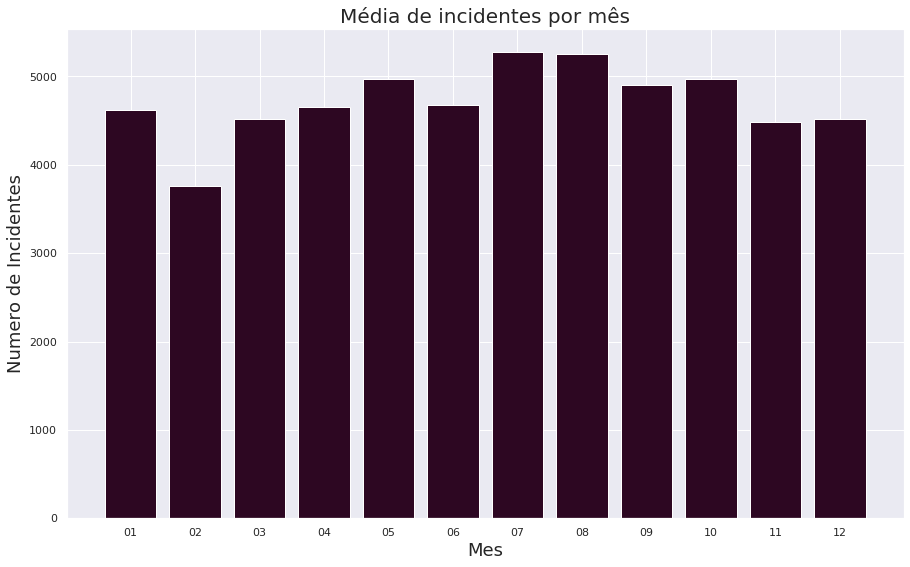

In [15]:
df['year-month'] = df['date'].map(lambda x: x[0:4] + '-' + x[5:7])

df = df[df['year-month'] > '2013-12']

mean_per_month = (df.groupby('year-month')
              .agg({'incident_id': 'count'})
              .reset_index()
              .rename(columns={'incident_id':'Number Of Incidents'}))

mean_per_month['month'] = mean_per_month['year-month'].map(lambda x: x[5:7])

mean_per_month = (mean_per_month.groupby('month')
              .agg({'Number Of Incidents': 'mean'})
              .reset_index())

title = 'Média de incidentes por mês'
x = 'Mes'
y = 'Numero de Incidentes'
basic_bar(mean_per_month['month'], mean_per_month['Number Of Incidents'], title, x, y)

Julho e Agosto são os meses com maior número médio de incidentes, por volta de 5200 todo ano.
Fevereiro é o mês com menor número de incidentes, por volta de 3700 todo ano.

###  Série temportal para total de incidentes, mortos e feridos

In [16]:
df = pd.read_csv('../databases/gun_violence.zip', compression='zip')

In [17]:
df['year'] = df['date'].map(lambda x: x[0:4])
df['year-month'] = df['date'].map(lambda x: x[0:4] + '-' + x[5:7])

### 2014 time series


In [18]:
temp = df[df['year'] == '2014'].groupby('date')\
                               .agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'})\
                               .reset_index()\
                               .rename(columns={'state' : 'incidents'})

In [19]:
labels = df[df['year'] == '2014'].groupby('year-month').count().reset_index()

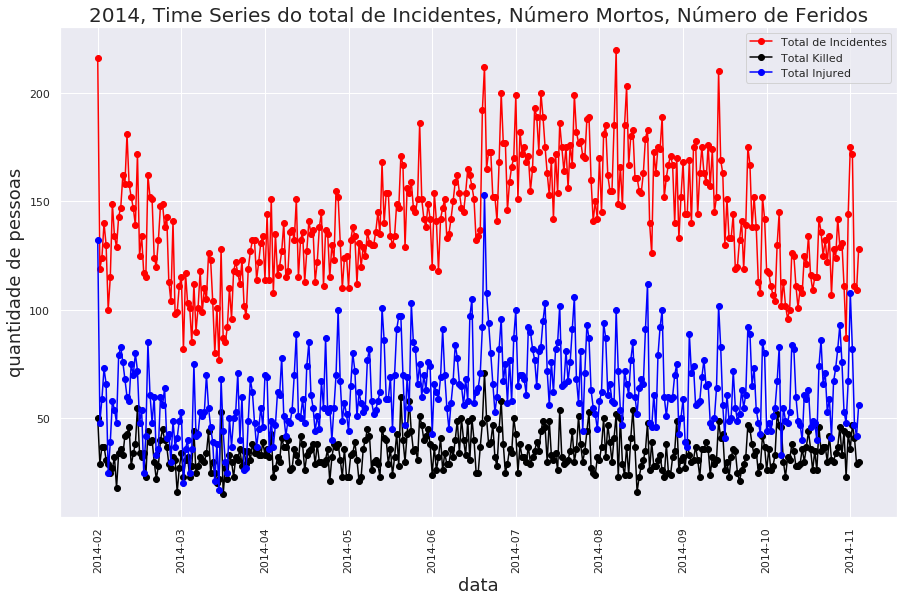

In [20]:

title = '2014, Time Series do total de Incidentes, Número Mortos, Número de Feridos' 
f, ax = plt.subplots()
ax.plot(temp['date'], temp['incidents'], label='Total de Incidentes', color = 'red',  marker='o')
ax.plot(temp['date'], temp['n_killed'], label="Total Killed", color = 'black',  marker='o')
ax.plot(temp['date'], temp['n_injured'], label="Total Injured", color = 'blue', marker='o')
ax.grid(linestyle='-')
ax.set_xlabel('data', size='18')
ax.set_ylabel('quantidade de pessoas', size='18')
ax.set_title(title, size='20')
ax.set_xticklabels(labels['year-month'], rotation='90')

ax.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.legend()
plt.show()


### 2015 time series


In [21]:
temp = df[df['year'] == '2015'].groupby('date')\
                               .agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'})\
                               .reset_index()\
                               .rename(columns={'state' : 'incidents'})

In [22]:
labels = df[df['year'] == '2014'].groupby('year-month').count().reset_index()

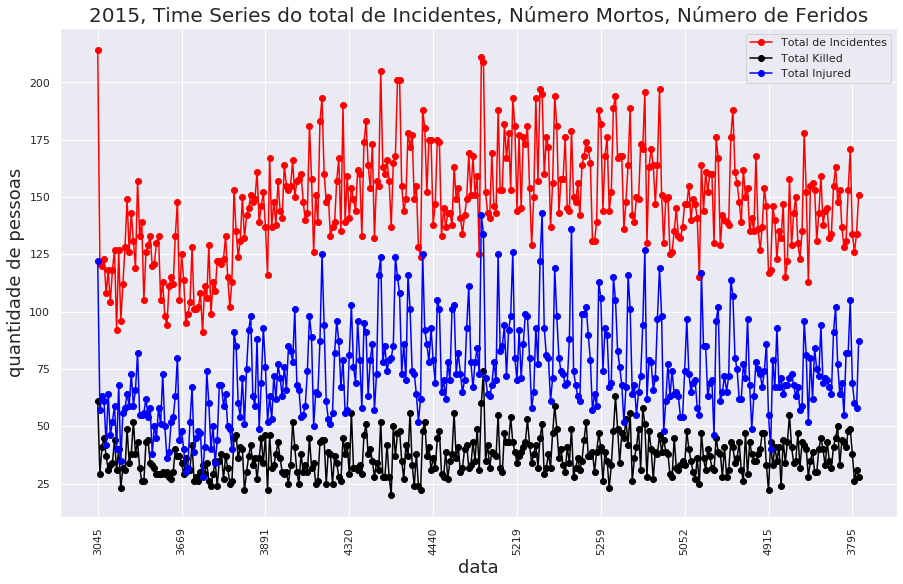

In [23]:

title = '2015, Time Series do total de Incidentes, Número Mortos, Número de Feridos' 
f, ax = plt.subplots()
ax.plot(temp['date'], temp['incidents'], label='Total de Incidentes', color = 'red',  marker='o')
ax.plot(temp['date'], temp['n_killed'], label="Total Killed", color = 'black',  marker='o')
ax.plot(temp['date'], temp['n_injured'], label="Total Injured", color = 'blue', marker='o')
ax.grid(linestyle='-')
ax.set_xlabel('data', size='18')
ax.set_ylabel('quantidade de pessoas', size='18')
ax.set_title(title, size='20')
ax.set_xticklabels(labels['date'], rotation='90')

ax.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.legend()
plt.show()


### 2016 time series


In [24]:
temp = df[df['year'] == '2016'].groupby('date')\
                               .agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'})\
                               .reset_index()\
                               .rename(columns={'state' : 'incidents'})

In [25]:
labels = df[df['year'] == '2016'].groupby('year-month').count().reset_index()

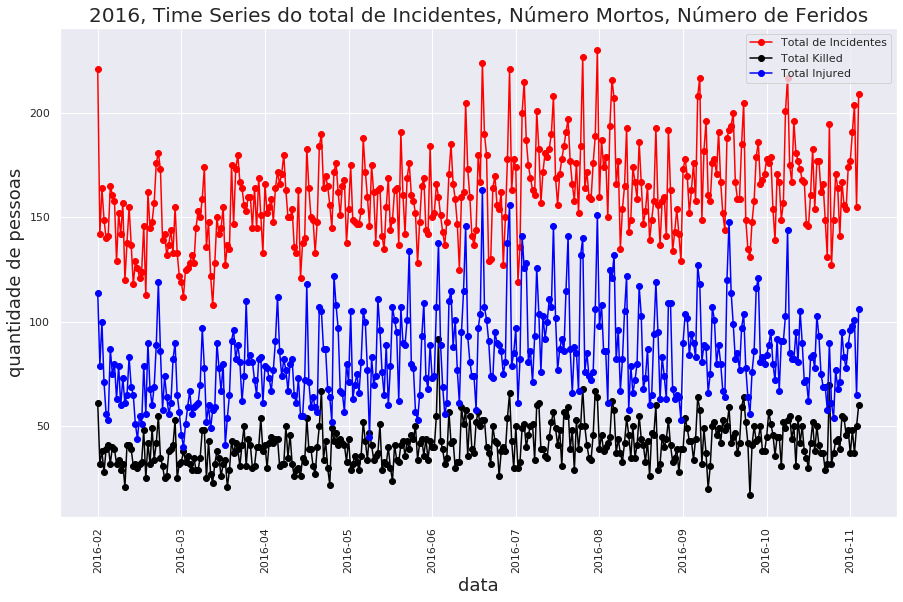

In [26]:

title = '2016, Time Series do total de Incidentes, Número Mortos, Número de Feridos' 
f, ax = plt.subplots()
ax.plot(temp['date'], temp['incidents'], label='Total de Incidentes', color = 'red',  marker='o')
ax.plot(temp['date'], temp['n_killed'], label="Total Killed", color = 'black',  marker='o')
ax.plot(temp['date'], temp['n_injured'], label="Total Injured", color = 'blue', marker='o')
ax.grid(linestyle='-')
ax.set_xlabel('data', size='18')
ax.set_ylabel('quantidade de pessoas', size='18')
ax.set_title(title, size='20')
ax.set_xticklabels(labels['year-month'], rotation='90')

ax.xaxis.set_major_locator(plt.MaxNLocator(13))
plt.legend()
plt.show()


### 2017 time series


In [27]:
temp = df[df['year'] == '2017'].groupby('date')\
                               .agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'})\
                               .reset_index()\
                               .rename(columns={'state' : 'incidents'})

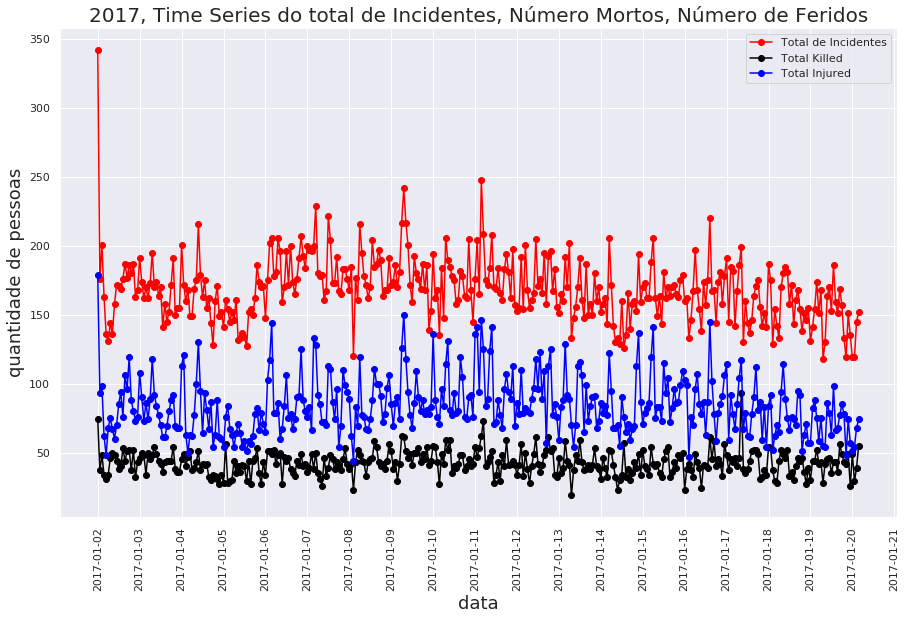

In [28]:

title = '2017, Time Series do total de Incidentes, Número Mortos, Número de Feridos' 
f, ax = plt.subplots()
ax.plot(temp['date'], temp['incidents'], label='Total de Incidentes', color = 'red',  marker='o')
ax.plot(temp['date'], temp['n_killed'], label="Total Killed", color = 'black',  marker='o')
ax.plot(temp['date'], temp['n_injured'], label="Total Injured", color = 'blue', marker='o')
ax.grid(linestyle='-')
ax.set_xlabel('data', size='18')
ax.set_ylabel('quantidade de pessoas', size='18')
ax.set_title(title, size='20')
ax.set_xticklabels(temp['date'], rotation='90')

ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.legend()
plt.show()


### Todos os anos time series


In [29]:
temp = df[df['year-month'] > '2013-12'].groupby('year-month')\
         .agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'})\
         .reset_index()\
         .rename(columns={'state' : 'incidents'})

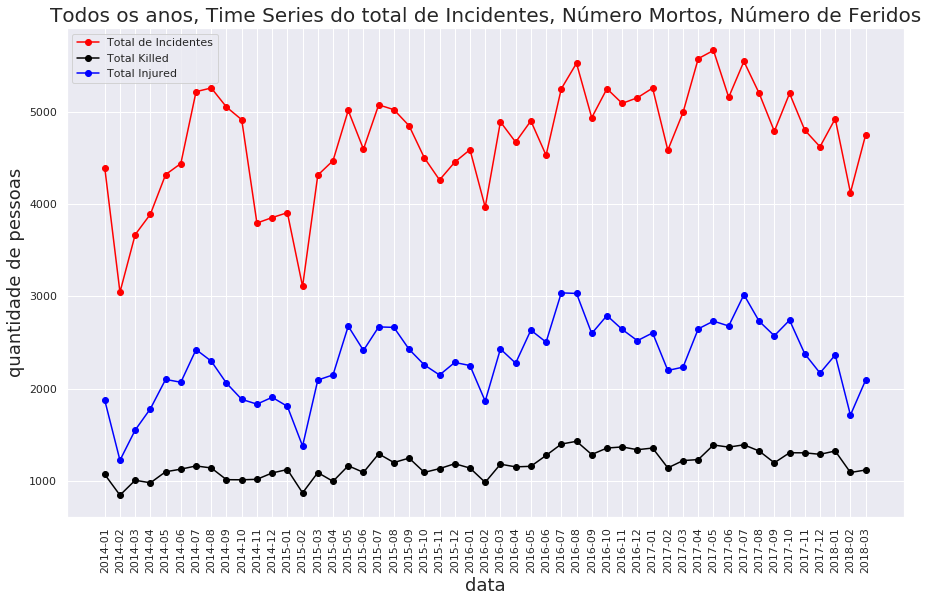

In [30]:
title = 'Todos os anos, Time Series do total de Incidentes, Número Mortos, Número de Feridos' 
f, ax = plt.subplots()
ax.plot(temp['year-month'], temp['incidents'], label='Total de Incidentes', color = 'red',  marker='o')
ax.plot(temp['year-month'], temp['n_killed'], label="Total Killed", color = 'black',  marker='o')
ax.plot(temp['year-month'], temp['n_injured'], label="Total Injured", color = 'blue', marker='o')
ax.grid(linestyle='-')
ax.set_xlabel('data', size='18')
ax.set_ylabel('quantidade de pessoas', size='18')
ax.set_title(title, size='20')
ax.set_xticklabels(temp['year-month'], rotation='90')

plt.legend()
plt.show()
